# RNN

`LSTM` - long short term memory

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

C:\Users\pk764\miniconda3\envs\tensorflow\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Subwords

## LSTM

#### Data

In [2]:
dataset,info=tfds.load('imdb_reviews/subwords8k',with_info=True,as_supervised=True)
tokenizer=info.features['text'].encoder

In [3]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256
train_data, test_data = dataset['train'], dataset['test'] 
train_dataset = train_data.shuffle(BUFFER_SIZE)

train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

#### Model

`Flatten/GlobalAveragePooling1D` layer will be switched to `LSTM` layer and put in `Bidirectional` layer.

In [17]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size,64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 64)          523840    
                                                                 
 bidirectional_4 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='BinaryCrossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
#history=model.fit(train_dataset,epochs=10,validation_data=test_dataset)

version with multiple layers:

In [20]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size,64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 64)          523840    
                                                                 
 bidirectional_7 (Bidirectio  (None, None, 128)        66048     
 nal)                                                            
                                                                 
 bidirectional_8 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 635,329
Trainable params: 635,329
Non-tr

In [ ]:
model.compile(loss='BinaryCrossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#history=model.fit(train_dataset,epochs=10,validation_data=test_dataset)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

---

## CNN

#### Data

In [23]:
dataset,info=tfds.load('imdb_reviews/subwords8k',with_info=True,as_supervised=True)
tokenizer=info.features['text'].encoder

In [24]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256
train_data, test_data = dataset['train'], dataset['test'] 
train_dataset = train_data.shuffle(BUFFER_SIZE)

train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

#### Model

In [26]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size,64),
    tf.keras.layers.Conv1D(filters=128,kernel_size=5,activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 64)          523840    
                                                                 
 conv1d (Conv1D)             (None, None, 128)         41088     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
________________________________________________

In [29]:
tokenizer.vocab_size

8185

In [27]:
model.compile(loss='BinaryCrossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
#history=model.fit(train_dataset,epochs=10,validation_data=test_dataset)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

---

## Words

In [42]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [34]:
imdb,info=tfds.load("imdb_reviews",with_info=True,as_supervised=True)
train,test=imdb['train'],imdb['test']

In [35]:
train_sentences=[]
train_labels=[]
for s,l in train:
    train_sentences.append(s.numpy().decode('utf8'))
    train_labels.append(l.numpy())

test_sentences=[]
test_labels=[]
for s,l in test:
    test_sentences.append(s.numpy().decode('utf8'))
    test_labels.append(l.numpy())

train_labels_final=np.array(train_labels)
test_labels_final=np.array(test_labels)

In [36]:
tokenizer=Tokenizer(num_words=10000,oov_token='<OOV>')
tokenizer.fit_on_texts(train_sentences)
word_index=tokenizer.word_index

sequences=tokenizer.texts_to_sequences(train_sentences)
padded=pad_sequences(sequences,maxlen=120,truncating='post')

test_sequences=tokenizer.texts_to_sequences(test_sentences)
test_padded=pad_sequences(test_sequences,maxlen=120,truncating='post')

#### Flatten

In [61]:
model_flatten=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000,16,input_length=120),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.GlobalAveragePooling1D()
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_flatten.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_flatten.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 120, 16)           160000    
                                                                 
 flatten_4 (Flatten)         (None, 1920)              0         
                                                                 
 dense_28 (Dense)            (None, 6)                 11526     
                                                                 
 dense_29 (Dense)            (None, 1)                 7         
                                                                 
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [62]:
history_flatten=model_flatten.fit(padded,train_labels_final,batch_size=128,epochs=10, validation_data=(test_padded, test_labels_final))

Epoch 1/10
196/196 [==============================] - 1s 5ms/step - loss: 0.6208 - accuracy: 0.6546 - val_loss: 0.4410 - val_accuracy: 0.8039
Epoch 2/10
196/196 [==============================] - 1s 4ms/step - loss: 0.3249 - accuracy: 0.8636 - val_loss: 0.3743 - val_accuracy: 0.8341
Epoch 3/10
196/196 [==============================] - 1s 4ms/step - loss: 0.2091 - accuracy: 0.9237 - val_loss: 0.3989 - val_accuracy: 0.8266
Epoch 4/10
196/196 [==============================] - 1s 4ms/step - loss: 0.1186 - accuracy: 0.9678 - val_loss: 0.4519 - val_accuracy: 0.8163
Epoch 5/10
196/196 [==============================] - 1s 4ms/step - loss: 0.0568 - accuracy: 0.9913 - val_loss: 0.4921 - val_accuracy: 0.8169
Epoch 6/10
196/196 [==============================] - 1s 4ms/step - loss: 0.0253 - accuracy: 0.9981 - val_loss: 0.5504 - val_accuracy: 0.8111
Epoch 7/10
196/196 [==============================] - 1s 4ms/step - loss: 0.0124 - accuracy: 0.9994 - val_loss: 0.5877 - val_accuracy: 0.8122
Epoch 

Text(0.5, 1.0, 'Accuracy')

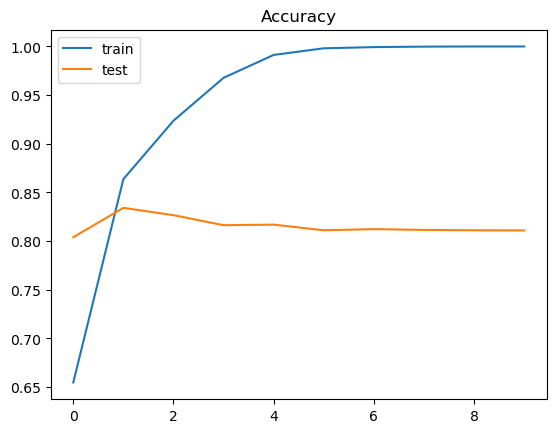

In [63]:
plt.plot(history_flatten.history['accuracy'],label='train')
plt.plot(history_flatten.history['val_accuracy'],label='test')
plt.legend()
plt.title('Accuracy')

#### CNN

In [67]:
model_conv=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000,16,input_length=120),
    tf.keras.layers.Conv1D(128,5,activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_conv.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 120, 16)           160000    
                                                                 
 conv1d_1 (Conv1D)           (None, 116, 128)          10368     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_32 (Dense)            (None, 6)                 774       
                                                                 
 dense_33 (Dense)            (None, 1)                 7         
                                                                 
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_______________________________________________

In [68]:
history_conv=model_conv.fit(padded,train_labels_final,batch_size=128,epochs=10, validation_data=(test_padded, test_labels_final))

Epoch 1/10
196/196 [==============================] - 7s 32ms/step - loss: 0.5390 - accuracy: 0.7136 - val_loss: 0.4095 - val_accuracy: 0.8144
Epoch 2/10
196/196 [==============================] - 6s 31ms/step - loss: 0.3012 - accuracy: 0.8768 - val_loss: 0.3956 - val_accuracy: 0.8242
Epoch 3/10
196/196 [==============================] - 6s 31ms/step - loss: 0.2415 - accuracy: 0.9055 - val_loss: 0.4183 - val_accuracy: 0.8246
Epoch 4/10
196/196 [==============================] - 6s 31ms/step - loss: 0.2075 - accuracy: 0.9232 - val_loss: 0.4565 - val_accuracy: 0.8202
Epoch 5/10
196/196 [==============================] - 7s 35ms/step - loss: 0.1803 - accuracy: 0.9347 - val_loss: 0.5401 - val_accuracy: 0.8056
Epoch 6/10
196/196 [==============================] - 7s 34ms/step - loss: 0.1624 - accuracy: 0.9438 - val_loss: 0.5717 - val_accuracy: 0.8060
Epoch 7/10
196/196 [==============================] - 7s 33ms/step - loss: 0.1413 - accuracy: 0.9514 - val_loss: 0.6108 - val_accuracy: 0.8036

Text(0.5, 1.0, 'Accuracy')

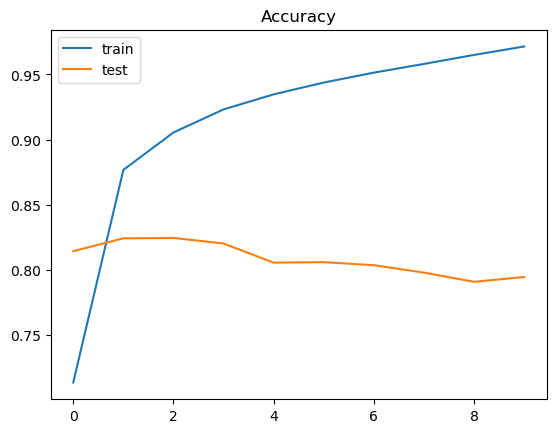

In [69]:
plt.plot(history_conv.history['accuracy'],label='train')
plt.plot(history_conv.history['val_accuracy'],label='test')
plt.legend()
plt.title('Accuracy')

#### LSTM

In [53]:
model_lstm=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000,16,input_length=120),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 120, 16)           160000    
                                                                 
 bidirectional_9 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 dense_24 (Dense)            (None, 6)                 390       
                                                                 
 dense_25 (Dense)            (None, 1)                 7         
                                                                 
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [57]:
history_lstm=model_lstm.fit(padded,train_labels_final,batch_size=128,epochs=10, validation_data=(test_padded, test_labels_final))

Epoch 1/10
196/196 [==============================] - 18s 78ms/step - loss: 0.5514 - accuracy: 0.6890 - val_loss: 0.4054 - val_accuracy: 0.8190
Epoch 2/10
196/196 [==============================] - 18s 93ms/step - loss: 0.3140 - accuracy: 0.8706 - val_loss: 0.3934 - val_accuracy: 0.8204
Epoch 3/10
196/196 [==============================] - 18s 92ms/step - loss: 0.2584 - accuracy: 0.8995 - val_loss: 0.4088 - val_accuracy: 0.8224
Epoch 4/10
196/196 [==============================] - 18s 93ms/step - loss: 0.2135 - accuracy: 0.9197 - val_loss: 0.4670 - val_accuracy: 0.8114
Epoch 5/10
196/196 [==============================] - 19s 95ms/step - loss: 0.1882 - accuracy: 0.9320 - val_loss: 0.5221 - val_accuracy: 0.8120
Epoch 6/10
196/196 [==============================] - 19s 96ms/step - loss: 0.1659 - accuracy: 0.9422 - val_loss: 0.5465 - val_accuracy: 0.8100
Epoch 7/10
196/196 [==============================] - 18s 94ms/step - loss: 0.1403 - accuracy: 0.9526 - val_loss: 0.5274 - val_accuracy:

Text(0.5, 1.0, 'Accuracy')

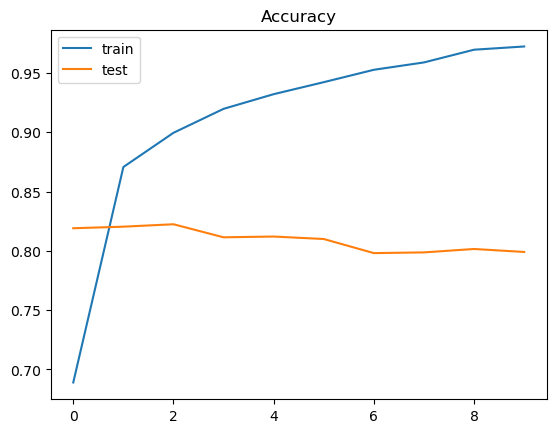

In [59]:
plt.plot(history_lstm.history['accuracy'],label='train')
plt.plot(history_lstm.history['val_accuracy'],label='test')
plt.legend()
plt.title('Accuracy')

#### GRU

`Gradient Recurrent Unit` - Like LSTM but faster

In [64]:
model_gru=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000,16,input_length=120),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_gru.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 120, 16)           160000    
                                                                 
 bidirectional_11 (Bidirecti  (None, 64)               9600      
 onal)                                                           
                                                                 
 dense_30 (Dense)            (None, 6)                 390       
                                                                 
 dense_31 (Dense)            (None, 1)                 7         
                                                                 
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [65]:
history_gru=model_gru.fit(padded,train_labels_final,batch_size=128,epochs=10, validation_data=(test_padded, test_labels_final))

Epoch 1/10
196/196 [==============================] - 19s 86ms/step - loss: 0.5832 - accuracy: 0.6604 - val_loss: 0.4138 - val_accuracy: 0.8151
Epoch 2/10
196/196 [==============================] - 19s 95ms/step - loss: 0.3210 - accuracy: 0.8662 - val_loss: 0.3882 - val_accuracy: 0.8232
Epoch 3/10
196/196 [==============================] - 18s 92ms/step - loss: 0.2388 - accuracy: 0.9104 - val_loss: 0.4093 - val_accuracy: 0.8186
Epoch 4/10
196/196 [==============================] - 18s 94ms/step - loss: 0.1998 - accuracy: 0.9279 - val_loss: 0.4652 - val_accuracy: 0.8065
Epoch 5/10
196/196 [==============================] - 21s 108ms/step - loss: 0.1548 - accuracy: 0.9467 - val_loss: 0.6189 - val_accuracy: 0.7994
Epoch 6/10
196/196 [==============================] - 28s 143ms/step - loss: 0.1203 - accuracy: 0.9612 - val_loss: 0.5869 - val_accuracy: 0.7996
Epoch 7/10
196/196 [==============================] - 20s 101ms/step - loss: 0.0921 - accuracy: 0.9715 - val_loss: 0.7150 - val_accura

Text(0.5, 1.0, 'Accuracy')

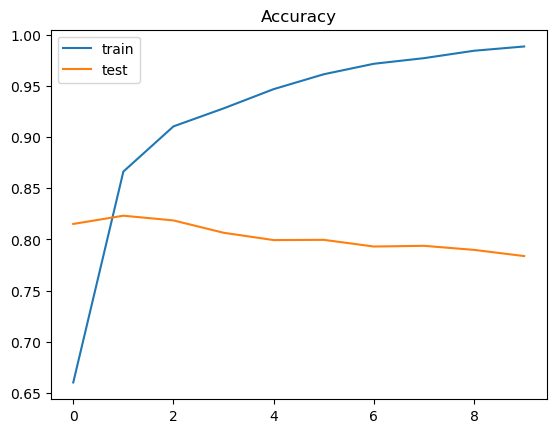

In [66]:
plt.plot(history_gru.history['accuracy'],label='train')
plt.plot(history_gru.history['val_accuracy'],label='test')
plt.legend()
plt.title('Accuracy')

---

## Sarcasm data

In [71]:
import json

In [79]:
with open("data/sarcasm_text.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [103]:
tokenizer=Tokenizer(num_words=10000,oov_token='<OOV>')
tokenizer.fit_on_texts(sentences)
word_index=tokenizer.word_index

In [104]:
train_sentences = sentences[0:20000]
test_sentences = sentences[20000:]

train_labels = labels[0:20000]
test_labels = labels[20000:]

In [105]:
sequences=tokenizer.texts_to_sequences(train_sentences)
padded=pad_sequences(sequences,maxlen=120,truncating='post',padding='post')

test_sequences=tokenizer.texts_to_sequences(test_sentences)
test_padded=pad_sequences(test_sequences,maxlen=120,truncating='post',padding='post')

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

#### CNN

In [106]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000,16,input_length=120),
    tf.keras.layers.Conv1D(128,5,activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 120, 16)           160000    
                                                                 
 conv1d_8 (Conv1D)           (None, 116, 128)          10368     
                                                                 
 global_max_pooling1d_5 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_46 (Dense)            (None, 6)                 774       
                                                                 
 dense_47 (Dense)            (None, 1)                 7         
                                                                 
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_______________________________________________

In [107]:
history=model.fit(padded,train_labels,epochs=10, validation_data=(test_padded, test_labels))

Epoch 1/10
625/625 [==============================] - 6s 9ms/step - loss: 0.5184 - accuracy: 0.7690 - val_loss: 0.4500 - val_accuracy: 0.8301
Epoch 2/10
625/625 [==============================] - 5s 9ms/step - loss: 0.3445 - accuracy: 0.8860 - val_loss: 0.4136 - val_accuracy: 0.8368
Epoch 3/10
625/625 [==============================] - 5s 8ms/step - loss: 0.2335 - accuracy: 0.9327 - val_loss: 0.4278 - val_accuracy: 0.8287
Epoch 4/10
625/625 [==============================] - 5s 8ms/step - loss: 0.1640 - accuracy: 0.9580 - val_loss: 0.4609 - val_accuracy: 0.8354
Epoch 5/10
625/625 [==============================] - 6s 10ms/step - loss: 0.1238 - accuracy: 0.9716 - val_loss: 0.5682 - val_accuracy: 0.8374
Epoch 6/10
625/625 [==============================] - 6s 10ms/step - loss: 0.1057 - accuracy: 0.9754 - val_loss: 0.6290 - val_accuracy: 0.8389
Epoch 7/10
625/625 [==============================] - 7s 10ms/step - loss: 0.0956 - accuracy: 0.9771 - val_loss: 0.7144 - val_accuracy: 0.8375
Epo

Text(0.5, 1.0, 'Accuracy')

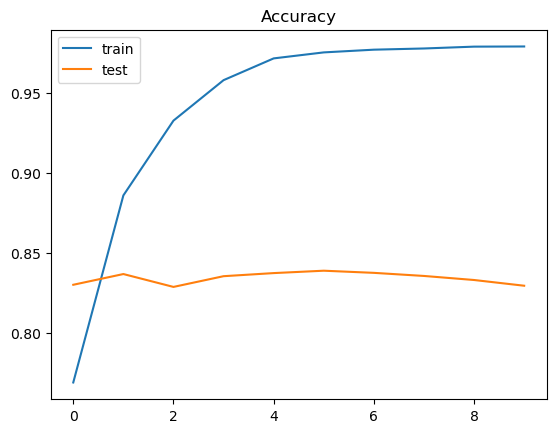

In [108]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.title('Accuracy')

#### LSTM

In [110]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000,16,input_length=120),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_26 (Embedding)    (None, 120, 16)           160000    
                                                                 
 bidirectional_12 (Bidirecti  (None, 64)               12544     
 onal)                                                           
                                                                 
 dense_48 (Dense)            (None, 24)                1560      
                                                                 
 dense_49 (Dense)            (None, 1)                 25        
                                                                 
Total params: 174,129
Trainable params: 174,129
Non-trainable params: 0
_________________________________________________________________


In [111]:
history=model.fit(padded,train_labels,epochs=10, validation_data=(test_padded, test_labels))

Epoch 1/10
625/625 [==============================] - 23s 33ms/step - loss: 0.4182 - accuracy: 0.7956 - val_loss: 0.3302 - val_accuracy: 0.8539
Epoch 2/10
625/625 [==============================] - 23s 38ms/step - loss: 0.2138 - accuracy: 0.9133 - val_loss: 0.3423 - val_accuracy: 0.8542
Epoch 3/10
625/625 [==============================] - 24s 38ms/step - loss: 0.1328 - accuracy: 0.9506 - val_loss: 0.4007 - val_accuracy: 0.8544
Epoch 4/10
625/625 [==============================] - 24s 38ms/step - loss: 0.0836 - accuracy: 0.9704 - val_loss: 0.5014 - val_accuracy: 0.8465
Epoch 5/10
625/625 [==============================] - 24s 38ms/step - loss: 0.0496 - accuracy: 0.9841 - val_loss: 0.6188 - val_accuracy: 0.8393
Epoch 6/10
625/625 [==============================] - 24s 38ms/step - loss: 0.0329 - accuracy: 0.9899 - val_loss: 0.7868 - val_accuracy: 0.8429
Epoch 7/10
625/625 [==============================] - 24s 38ms/step - loss: 0.0219 - accuracy: 0.9936 - val_loss: 0.9730 - val_accuracy:

Text(0.5, 1.0, 'Accuracy')

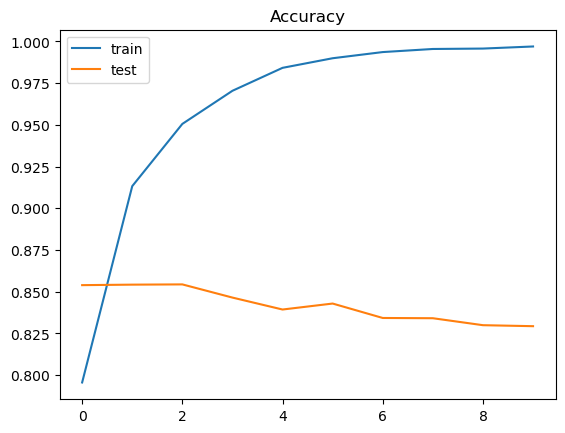

In [112]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.title('Accuracy')

---

## Embedding text